## Q1. Find five recipes that you like the most from any of the online repositories. 
### (a) Extract and represent the information from them in the traditional form (ingredients and cooking instructions); example below. 


## First Recepie (Tandoori Roti):

**Ingredients:**
     
     1 cup whole wheat floor
     1 tsp dry yeast
     1 tsp sugar
     1 tsp finely choped garlic
     salt to taste
     1 tsp oil

<br>**Steps:**<br>
  
    1. Combine the dry yeast, sugar and 1 tbsp of warm water in bowl, mix well and cover and keep aside for 10 minutes.
    2. Combine all the ingredients, including the yeast mixture into a deep bowl and knead into a soft dough using enough water.
    3. Cover with damp muslin
    4. Divide the dough into 8 equal portions.
    5. Roll a portion of the dough into 150 mm.
    6. Cook it on an open flame till it puffs up and brown spots appear on both sides

<br>

## Second Recepie (Omlet in Bowl)

**Ingredients:**
    2 Eggs
    Salt
    pepper
    onion
    tomatoes
    green chillies
    garlic

   
Method:

1. Break eggs in bowl

2. Add salt and pepper as per taste

3. Add onion, tomatoes, green chilli

4. Wisk and put it in microwave for 2,3 min
    
<br>

## Third Recepie (Moong Daal ka Shorba)

**Ingredients:**
    3/4 cup yellow moong daal
    1/2 cup finely chopped onion
    1 slit green chilli
    1/2 tsp chopped ginger
    1/2 tsp turmeric powder
    1 tsp garam masala
    salt
    1 tsp ghee
    1 tbsp finely chopped garlic

**Steps:**

1. Combine the dal, onion, tonatoes, green chilli, chilli powder, ginger, turmeric powder, garam masala, salt and 2 cups of water, mix well and cook for 3 whistles
2. Heat the ghee in deep kadhai, add the garluc and saute on a flame for a few seconds
3. Add the cooked moong-daal mixture and 1 cup of water, mix well using a whisk and cook on a medium before flame for 1 to 2 min
4. Add 1 more cup of water, mix well and cook on a medium flame for 3 to 4 min, while stirring occasionally with help of whisk. Finally discard the green chilli.

<br>

## Fourth Recepie (Kande ke Pakode)

**Ingredients** 

    1 cup besan
    1/4 cup rice flour
    1/4 tsp hing
    1 1/2 tsp chilli powder
    a pinch of baking soda
    1 tbsp hot oil
    salt
    1 cup of water

**Steps**

1.   Combine the kand slices, black salt, asafoetida, chilli powder and lemon juice in a depp bowl and toss well
2.   Heat oil, dip few slices of yam into the prepared batter and deep-fry till they are golden brown in colour
3.   Drain on an absorbant paper

<br>

## Fifth Recepie (Dahi-Pohe)

**Ingredients** 

    1 green chilli
    kadi patta
    mustered seeds
    1/2 tsp cumin seeds
    1/2 tsp urad dal
    4 cashewnuts
    3 tsp oil


**Method:**

1.  Wash and drain poha

2.  Add yoghurt and salt

3.  Add oil to kadhai and warm it

4.  Add green chillies and kadi patta

5. Pour seasoningon poha and mix nicely

6. if poha is dry add some more yoghurt

7. garnish it with finely chopped coriander leaves


(b) Further, store the recipes in the form of a (Recipe ID)—(Ingredient Name) form. [5]

TR - Wheat flour
TR - dry yeast
TR -  sugar
TR - garlic
TR - oil

**************************************** 
omlet - egg 
omlet - pepper  
omlet - onion 
omlet - green chillies  
omlet - tomato  
omlet - garlic  
****************************************
MDS - moong dal
MDS - ghee 
MDS - onions  
MDS - green chilli 
MDS - ginger
MDS - garlic
MDS - garam masala 
**************************************
Pak - besan 
Pak - rice flour 
Pak - hing
Pak - chilli powder  
Pak - oil  
***********************************
Poha - green chilli 
Poha - kadi patta
Poha - cumin seeds  
Poha - urad dal 
Poha - kaju   
 

(c) In general, as well as specific to each recipe, comment on which aspects of the recipes are
being lost in the process of coarse-graining the recipe data? 

Things lost while coarse graining the recipe data:  
1. Ingredients used
2. Amount of ingredients
3. state of the ingredient that is liquid or solid or semi liquid.
4. order in which ingredients to be used to make the perfect dish
5. cooking method (microwave, gas, chullah etc)

(d) How could one possibly mitigate this to extract the most details from the recipes? [5]

We can add other features like type of ingredients added (same ingredient can appear in different types accordin to geography), time for which have to wait to put the next ingredient, state of the ingredient  

Then we can apply feature selection methods to choose the IMP features.

# Q2   

In [10]:
#Importing all necessary libraries

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Mounting the drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#Here we have imported the library
#Reading Train dataset in json
Train = pd.read_json('/content/drive/MyDrive/Colab Notebooks/train.json') 
Train.head() #This gives the head view of the dataset

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [14]:
#Here we have imported the test dataset
#Reading the Test dataset in json
Test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/test.json') 
Test.head() #The headview of the test dataset

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


(a) Find number of recipes, number of unique ingredients, number of cuisines.

In [15]:
print('The number of Unique Reciepies are - ',len(Train.id.unique()))

The number of Unique Reciepies are -  39774


In [17]:
#For the unique incredients
ingredients = [ ]
for i in Train.ingredients: #For loop used
  for j in i:
    ingredients.append(j)
    
print('The number of Unique Ingredients comes out to be - ',len(set(ingredients)))

The number of Unique Ingredients comes out to be -  6714


In [18]:
print('The number of Unique Cuisines are- ',len(Train.cuisine.unique()))
c = Train.cuisine.unique()

The number of Unique Cuisines are-  20


In [19]:
cu = []
rec = []
for i in c:
  das = Train.loc[ Train.cuisine == i ]
  rece = len(das.id.unique())
  cu.append(i)
  rec.append(rece)

(b) Plot the statistics (bar plot) of number of recipes for each cuisine.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

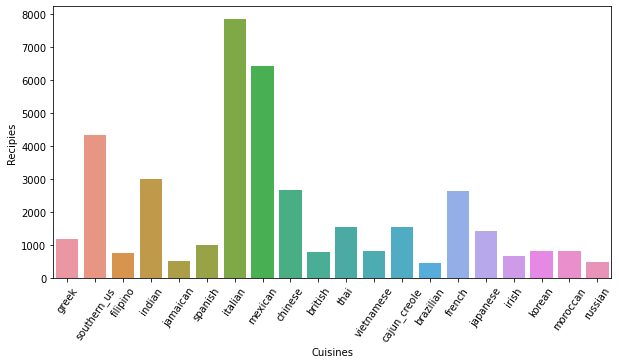

In [20]:
sns.set_theme
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=cu, y=rec)
plt.xlabel("Cuisines")
plt.ylabel("Recipies")
plt.xticks(rotation=55)

(c) Plot the recipe size distribution for each cuisine as well as for all the 
recipes.


In [21]:
for i in range(Train.shape[0]):
  Train.loc[i,'total_ingr'] = len(Train.loc[i,'ingredients'])
Train

,id,cuisine,ingredients,total_ingr
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9.0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11.0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12.0
3,22213,indian,"[water, vegetable oil, wheat, salt]",4.0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20.0
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12.0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7.0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12.0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21.0


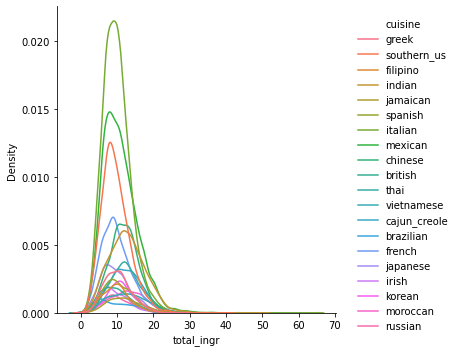

In [22]:
# Plotting the recipe Size distribution for individual cuisine
sns.displot(Train, x="total_ingr", kind="kde", hue='cuisine')


(d) Plot cumulative distribution of recipe size and interpret

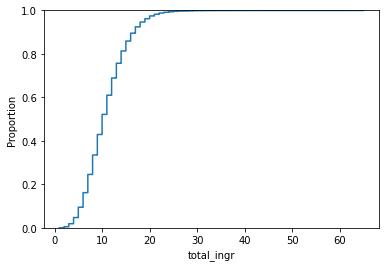

In [24]:
# Plotting the cumulative distribution of recipe size and interpret
sns.ecdfplot(Train, x="total_ingr")

Interpretations: 

We can conclude that almost every dish has more tha 30 ingredients.<br>   
Most probable recipe belong to an Italian cuisine followed by Mexican cuisin.

# Q3.

In [25]:
df = Train.copy()
s = df.apply(lambda x: pd.Series(x['ingredients']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'ingredient'
df = df.join(s)

(a) Plot the frequency-rank distribution for all the recipes and interpret. [3]



In [26]:
count = df.groupby(['ingredient']).count()
count = count.iloc[:,:1]
count['ranks'] = count['id'].rank()
count

,id,ranks
ingredient,,
( oz.) tomato sauce,11,4489.0
( oz.) tomato paste,9,4246.5
(10 oz.) frozen chopped spinach,3,2797.5
"(10 oz.) frozen chopped spinach, thawed and squeezed dry",2,2157.5
(14 oz.) sweetened condensed milk,2,2157.5
...,...,...
zesty italian dressing,17,4896.5
zinfandel,10,4378.5
ziti,29,5343.5


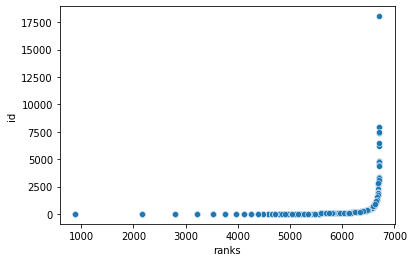

In [27]:
#Plotting the scatterplot here
sns.scatterplot(data=count, x="ranks", y="id")

(b) List the 10 most popular ingredients in the recipes. [2] 

In [28]:
count = count.sort_values(by=['ranks'])
count.id[:11]

ingredient
hot pepperoni          1
matcha                 1
matsutake mushrooms    1
matzo cake meal        1
matzos                 1
celery powder          1
meat drippings         1
meat extract           1
meat fats              1
ceci bean              1
meat loaf mixture      1
Name: id, dtype: int64

(c) Plot the ingredient-rank distribution for each of the cuisines and list the most popular
ingredients for each cuisine

In [29]:
# For popularoty of ingredients as per cuisines
s = df.groupby(['ingredient', 'cuisine']).size()
df = s.loc[s.groupby(level=0).idxmax()].reset_index().drop(0,axis=1)
df

,ingredient,cuisine
0,( oz.) tomato sauce,italian
1,( oz.) tomato paste,italian
2,(10 oz.) frozen chopped spinach,italian
3,"(10 oz.) frozen chopped spinach, thawed and sq...",greek
4,(14 oz.) sweetened condensed milk,indian
...,...,...
6709,zesty italian dressing,italian
6710,zinfandel,french
6711,ziti,italian
6712,zucchini,italian


(d) What is your interpretation of the results? [5]

***The most common ingredient appears fourteen times.
In comparison to the simple power plot, the log power plot provides a superior interpretation plot.***